In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/content/ANN_data.xlsx"

In [3]:
df = pd.read_excel(path)

In [4]:
df.head()

,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Average
0,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5.0
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5.0
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5.0
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4.0
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4.0


In [5]:
df.describe()

,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Average
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,4.090909,4.404545,4.027273,4.140909,4.118182,3.977273,3.959091,3.900000,3.836364,3.763636,...,4.068182,3.854545,3.913636,4.040909,4.136364,4.022727,3.922727,3.913636,4.081818,3.994835
std,0.574106,0.519024,0.739728,0.567908,0.592677,0.705123,0.650366,0.827054,0.702601,0.647119,...,0.619240,0.659824,0.652914,0.567908,0.548593,0.622582,0.580058,0.624314,0.542812,0.335651
min,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.340909
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.750000,3.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.772727
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.954545
75%,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.159091
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
# defining the skill level based on the average
def skill_level_func(x):
  if x > 4.05:
    return "High"
  elif x > 3.8:
    return "Medium"
  else:
    return "Low"

In [7]:
# adding skill level column
df["Skill_level"] = df["Average"].transform(skill_level_func)

In [8]:
features = df.iloc[:, :-2]
target = df["Skill_level"]

In [9]:
features.head()

,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,...,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59
0,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [10]:
target.head()

0      High
1      High
2      High
3    Medium
4    Medium
Name: Skill_level, dtype: object

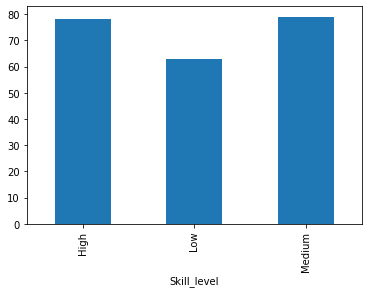

In [11]:
df.groupby('Skill_level').Average.count().plot.bar(ylim = 0)

Classes look almost uniformly distributed from the graph.

In [12]:
# normalize the data to have mean 0 and variance 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

In [13]:
features

array([[ 1.58710166,  1.14987513,  1.31797788, ...,  1.861416  ,
         1.744061  ,  1.69538515],
       [ 1.58710166,  1.14987513,  1.31797788, ...,  1.861416  ,
         1.744061  ,  1.69538515],
       [ 1.58710166,  1.14987513,  1.31797788, ...,  1.861416  ,
         1.744061  ,  1.69538515],
       ...,
       [-0.15871017,  1.14987513, -1.39188318, ...,  0.13351929,
        -1.4667626 , -0.15107392],
       [-1.904522  ,  1.14987513,  1.31797788, ...,  1.861416  ,
         1.744061  , -0.15107392],
       [ 1.58710166,  1.14987513,  1.31797788, ...,  0.13351929,
        -1.4667626 , -0.15107392]])

In [14]:
# converting class name to integer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(target)
encoded_target = encoder.transform(target)

In [15]:
target = to_categorical(encoded_target) # one hot encoding of the target

In [16]:
features.shape

(220, 44)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [18]:
# define a keras model for multiclass classification
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential([
    Dense(64, activation='relu', input_shape=(None, features.shape[1])),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])	# compile the model


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 64)          2880      
                                                                 
 dense_1 (Dense)             (None, None, 3)           195       
                                                                 
Total params: 3,075
Trainable params: 3,075
Non-trainable params: 0
_________________________________________________________________


In [20]:
for layer in model.layers:
    print(layer.output_shape)

(None, None, 64)
(None, None, 3)


In [21]:
num_epochs = 100
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100


6/6 - 1s - loss: 1.2509 - accuracy: 0.3466 - precision: 0.3875 - recall: 0.1761 - val_loss: 1.0942 - val_accuracy: 0.4318 - val_precision: 0.4400 - val_recall: 0.2500 - 1s/epoch - 215ms/step
Epoch 2/100
6/6 - 0s - loss: 1.0007 - accuracy: 0.4943 - precision: 0.6596 - recall: 0.3523 - val_loss: 0.9477 - val_accuracy: 0.5682 - val_precision: 0.6154 - val_recall: 0.3636 - 37ms/epoch - 6ms/step
Epoch 3/100
6/6 - 0s - loss: 0.8399 - accuracy: 0.5852 - precision: 0.7476 - recall: 0.4375 - val_loss: 0.8533 - val_accuracy: 0.6364 - val_precision: 0.6552 - val_recall: 0.4318 - 38ms/epoch - 6ms/step
Epoch 4/100
6/6 - 0s - loss: 0.7375 - accuracy: 0.6534 - precision: 0.7876 - recall: 0.5057 - val_loss: 0.7853 - val_accuracy: 0.6818 - val_precision: 0.6970 - val_recall: 0.5227 - 34ms/epoch - 6ms/step
Epoch 5/100
6/6 - 0s - loss: 0.6601 - accuracy: 0.7386 - precision: 0.8347 - recall: 0.5739 - val_loss: 0.7364 - val_accuracy: 0.6818 - val_precision: 0.7222 - val_recall: 0.5909 - 35ms/epoch - 6ms/st

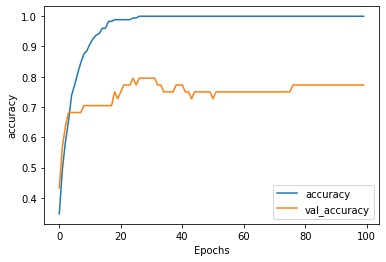

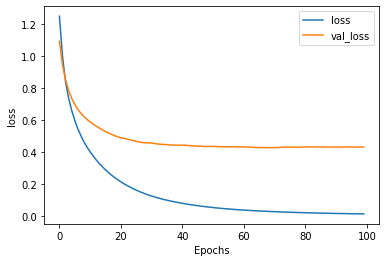

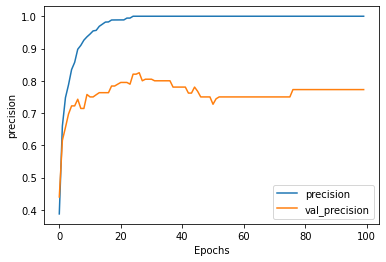

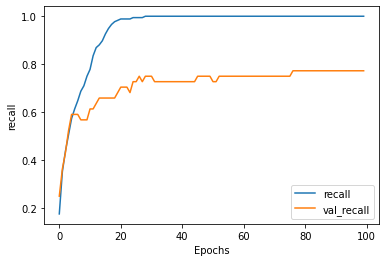

In [22]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
plot_graphs(history, "precision")
plot_graphs(history, "recall")

In [23]:
print(model.predict(X_test))

[[1.62902176e-02 7.18960762e-02 9.11813736e-01]
 [1.84091583e-01 2.07822621e-01 6.08085811e-01]
 [1.74107682e-02 9.25724953e-03 9.73331988e-01]
 [5.46689153e-01 1.50509737e-02 4.38259929e-01]
 [9.48788345e-01 2.18493044e-02 2.93622967e-02]
 [1.61390712e-09 9.99996305e-01 3.74614478e-06]
 [1.64258868e-01 1.11315772e-03 8.34627986e-01]
 [6.43835217e-02 8.40129554e-01 9.54869092e-02]
 [9.99976993e-01 1.62918479e-06 2.13186322e-05]
 [3.34582895e-01 2.88566668e-02 6.36560440e-01]
 [5.39198220e-01 1.94988839e-04 4.60606754e-01]
 [3.76282819e-02 1.43502265e-01 8.18869412e-01]
 [2.17319766e-07 8.98875952e-01 1.01123840e-01]
 [4.54330295e-02 4.01183171e-03 9.50555086e-01]
 [2.31497415e-05 2.81818733e-02 9.71794963e-01]
 [9.48194981e-01 1.20924665e-02 3.97125371e-02]
 [1.78141822e-03 6.69087410e-01 3.29131186e-01]
 [7.26903200e-01 1.34265851e-02 2.59670258e-01]
 [9.99794066e-01 6.65826010e-05 1.39323020e-04]
 [2.94329196e-01 1.34531669e-02 6.92217588e-01]
 [1.15565365e-06 3.46619636e-01 6.533792